In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import the data

In [43]:
cci_data = pd.read_csv("cci_prep.csv")
cci_data.head()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE
0,12,1,0,1,0,2,1,1,9,2,0,0,0,1
1,12,4,0,0,5,5,4,3,10,0,0,3,3,0
2,12,3,2,0,0,5,2,2,10,10,10,0,0,3
3,12,2,1,0,0,3,2,1,10,1,1,0,0,1
4,12,3,0,3,0,3,3,3,10,7,0,0,0,2


# K-Modes

In [44]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
X= np.asarray(cci_data)
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmodes = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmodes.fit(X)
    # sse
    cost.append(kmodes.cost_)
    # silouhaite
    sil.append(silhouette_score(X, kmodes.labels_, metric='euclidean')) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 402, cost: 56913.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1250, cost: 49033.0
Run 1, iteration: 2/100, moves: 264, cost: 49033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1160, cost: 47987.0
Run 1, iteration: 2/100, moves: 454, cost: 47987.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1792, cost: 45345.0
Run 1, iteration: 2/100, moves: 501, cost: 45345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1757, cost: 45026.0
Run 1, iteration: 2/100, moves: 471, cost: 45026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1567, cost: 44771.0
Run 1

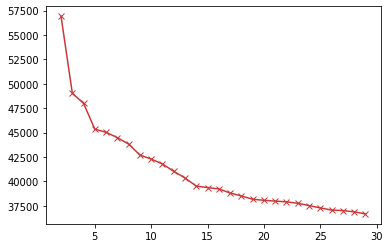

In [45]:
import matplotlib.pyplot as plt
plt.plot(np.arange(2,30), cost, 'bx-', color = '#C93838');

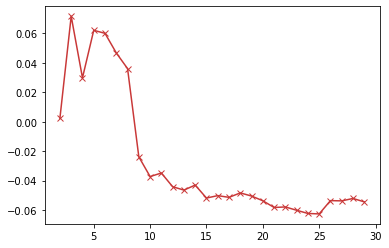

In [46]:
plt.plot(np.arange(2,30), sil, 'bx-', color = '#C93838')

In [18]:
kmodes= KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
kmodes.fit(X)
labels=kmodes.labels_
clusters_Kmode=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmode.dropna(inplace = True)
# clusters_Kmode.to_csv("Kmodes/data.csv", index=False)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1792, cost: 45345.0
Run 1, iteration: 2/100, moves: 501, cost: 45345.0


In [19]:
clusters_Kmode.head()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,cluster
0,12,1,0,1,0,2,1,1,9,2,0,0,0,1,0
1,12,4,0,0,5,5,4,3,10,0,0,3,3,0,2
2,12,3,2,0,0,5,2,2,10,10,10,0,0,3,1
3,12,2,1,0,0,3,2,1,10,1,1,0,0,1,1
4,12,3,0,3,0,3,3,3,10,7,0,0,0,2,0


In [20]:
clusters_Kmode.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE
cluster,,,,,,,,,,,,,,
0,11.415293,1.710979,0.560154,1.338127,0.553139,3.387233,1.956857,1.443704,8.800772,7.451421,1.287618,0.701859,2.645037,2.873027
1,11.654809,2.589592,1.405138,0.505270,1.391963,4.090250,2.498024,1.753623,8.759552,3.457181,2.109354,1.683794,0.683794,1.851120
2,11.390103,2.851092,0.176549,0.147570,2.426661,3.630852,2.338386,1.843513,9.237628,0.766384,0.347749,2.941150,0.531431,0.399911
3,11.563037,2.452722,1.641834,0.734957,0.959885,3.532951,2.272206,1.676218,9.428367,5.664756,3.782235,1.342407,0.901146,2.657593
4,11.881599,2.407240,2.748115,2.139517,0.774510,4.699849,3.448718,1.668175,9.781297,9.506787,6.792609,0.947210,3.179487,5.669683


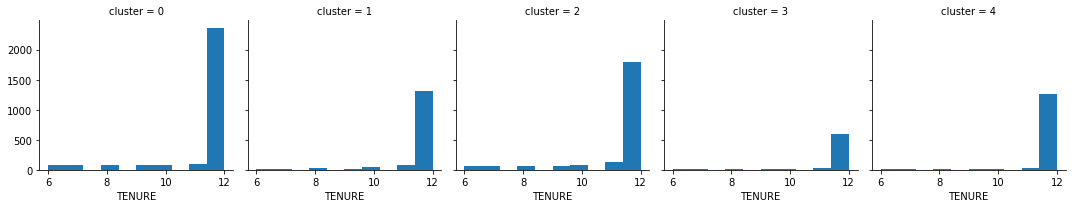

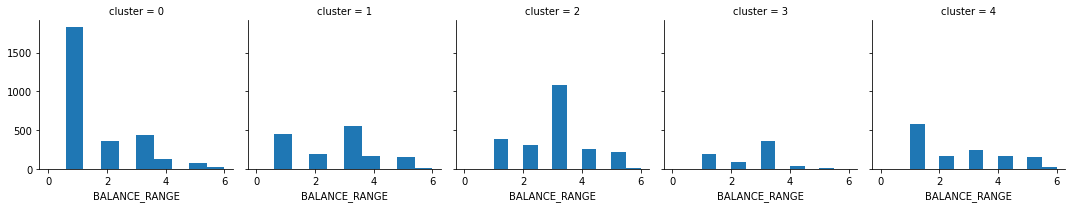

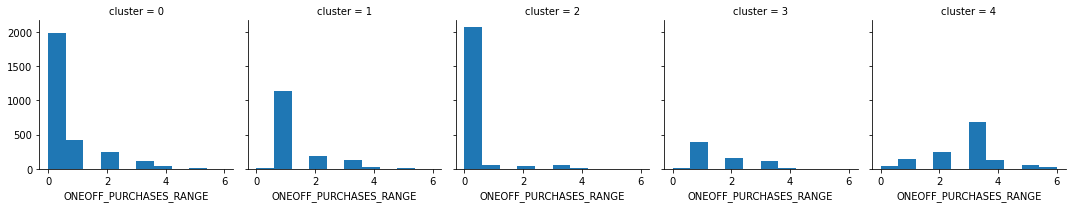

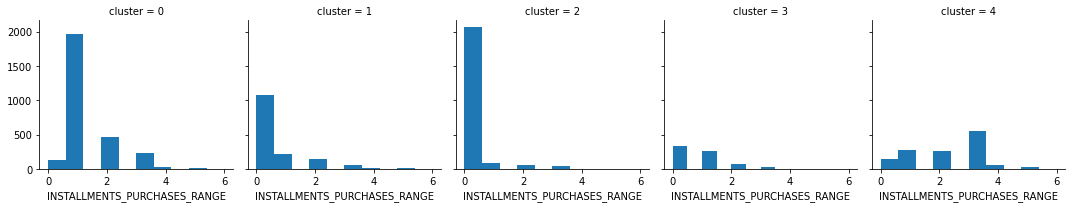

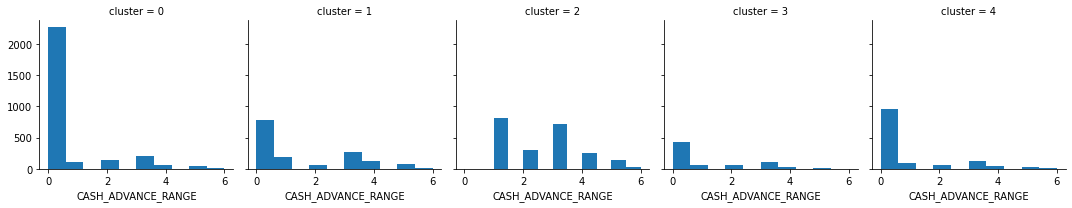

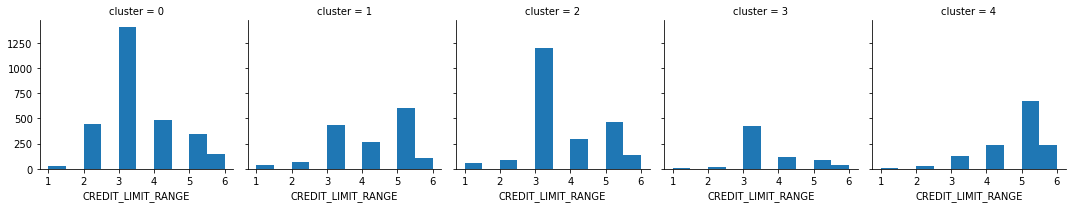

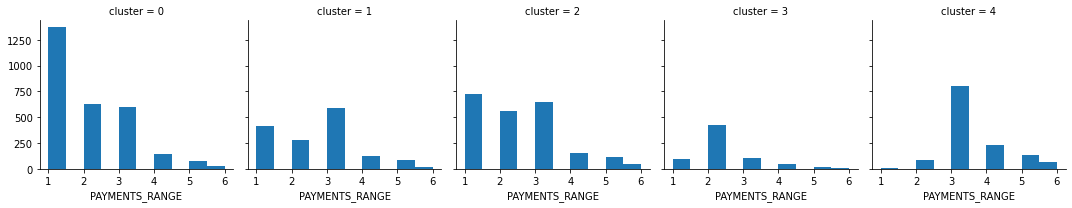

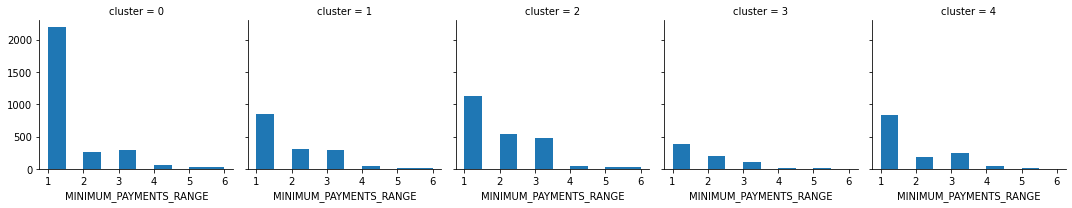

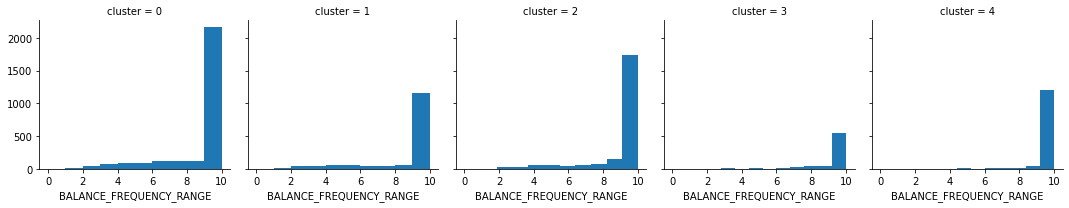

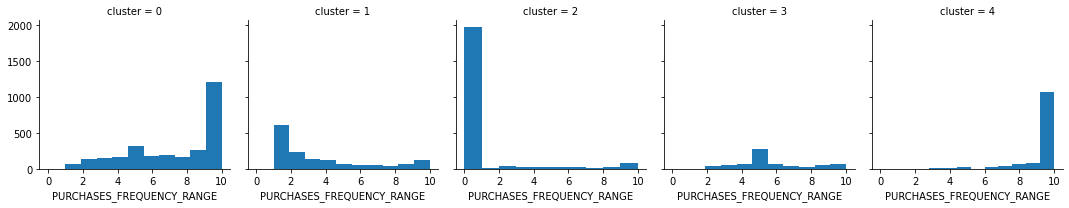

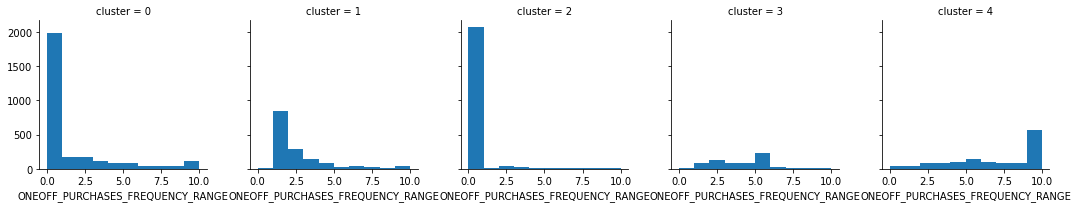

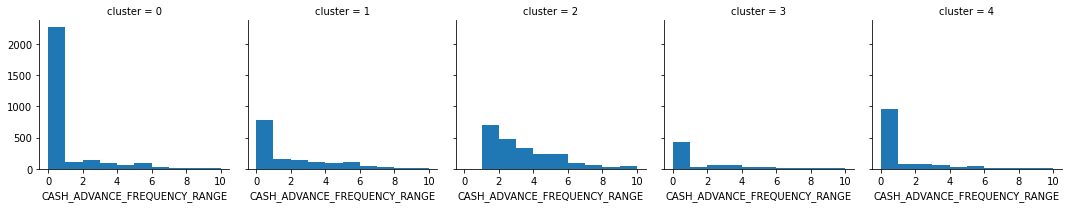

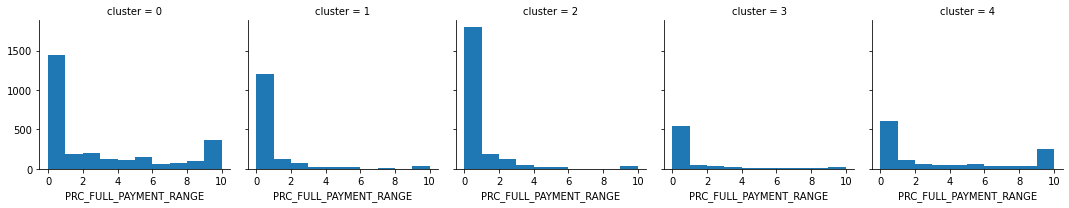

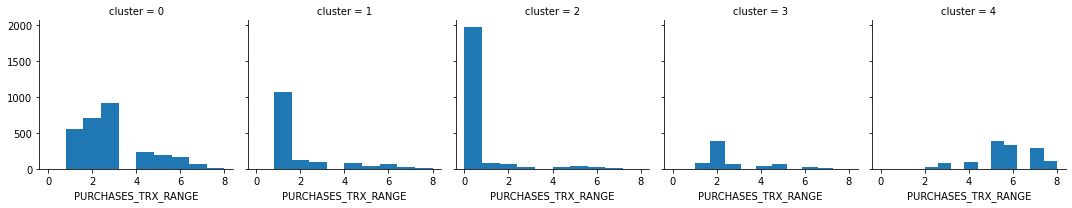

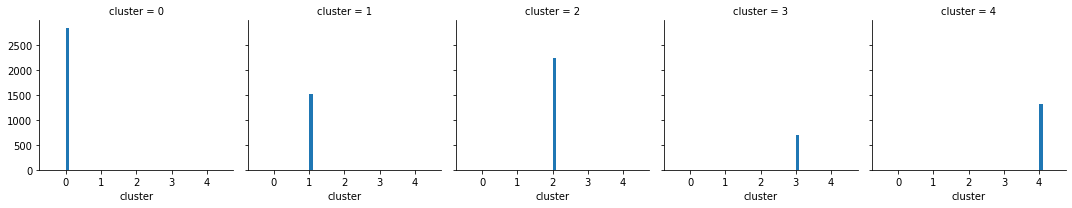

In [22]:
for c in clusters_Kmode:
    grid= sns.FacetGrid(clusters_Kmode, col='cluster')
    grid.map(plt.hist, c)

### PCA Representation

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

dist = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8636, 2)

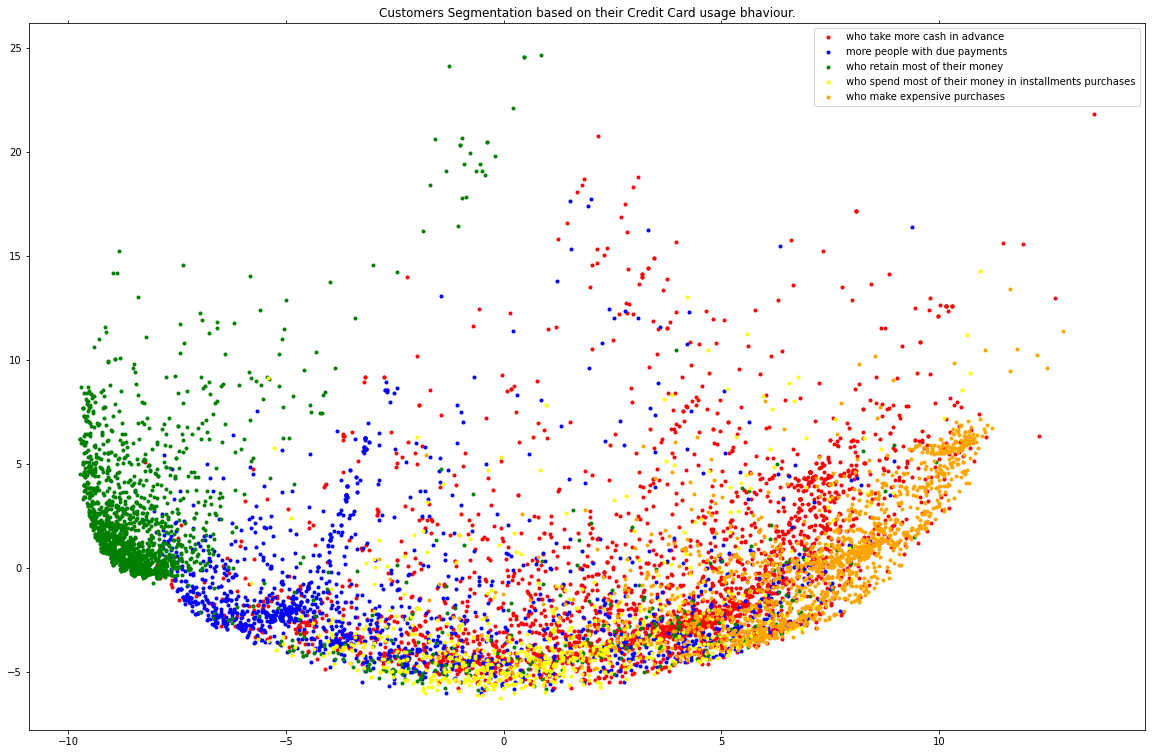

In [25]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange'}

names = {0: 'who take more cash in advance',#ok
         1: 'more people with due payments', 
         2: 'who retain most of their money',#ok 
         3: 'who spend most of their money in installments purchases',#ok
         4: 'who make expensive purchases'}
#        5: 'who spends most of their money on all type of purchases'}#ok
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Hierarchical

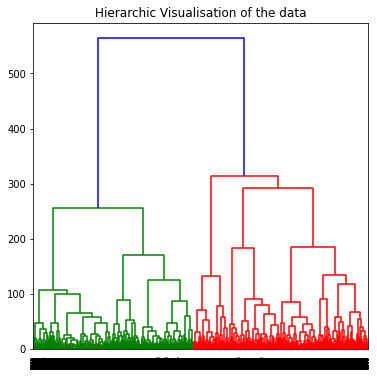

In [48]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
X= np.asarray(cci_data)
plt.figure(figsize =(6, 6))
plt.title('Hierarchic Visualisation of the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward', metric= 'euclidean')))

In [49]:
from sklearn.cluster import AgglomerativeClustering
sil = []
for n_cluster in range(2, 8):
    sil.append(silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)))

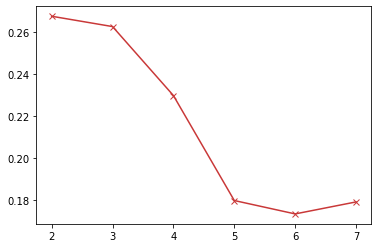

In [50]:
plt.plot(np.arange(2,8), sil, 'bx-', color = '#C93838')

In [35]:
agg = AgglomerativeClustering(n_clusters = 6).fit_predict(X)
clusters_H=pd.concat([cci_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters_H.dropna(inplace = True)
clusters_H.head()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,cluster
0,12,1,0,1,0,2,1,1,9,2,0,0,0,1,1
1,12,4,0,0,5,5,4,3,10,0,0,3,3,0,4
2,12,3,2,0,0,5,2,2,10,10,10,0,0,3,0
3,12,2,1,0,0,3,2,1,10,1,1,0,0,1,1
4,12,3,0,3,0,3,3,3,10,7,0,0,0,2,1


In [36]:
clusters_H.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE
cluster,,,,,,,,,,,,,,
0,11.929062,2.372235,2.858886,1.852021,0.464531,4.504195,3.289855,1.610984,9.914569,9.680397,7.928299,0.497330,3.114416,5.624714
1,11.721694,1.739772,0.771646,0.613701,0.546622,3.497146,1.929591,1.370124,7.529971,3.139391,0.932921,0.505233,0.716461,1.381541
2,11.467900,1.019587,0.458107,1.526659,0.101197,3.593036,2.054407,1.032644,8.414581,7.718172,0.751904,0.093580,7.852013,2.906420
3,11.535770,3.085537,1.650078,1.080093,2.353033,4.117418,2.888802,2.106532,9.708398,6.447900,3.673406,3.087869,0.587092,3.217729
4,11.263984,3.138371,0.190873,0.040726,2.663886,3.763003,2.346418,1.942591,9.793916,0.318940,0.238469,3.404318,0.239941,0.195289
5,11.227551,2.081633,0.626531,1.704082,0.534694,3.251020,2.062245,1.720408,9.852041,9.638776,1.065306,0.651020,0.578571,3.863265


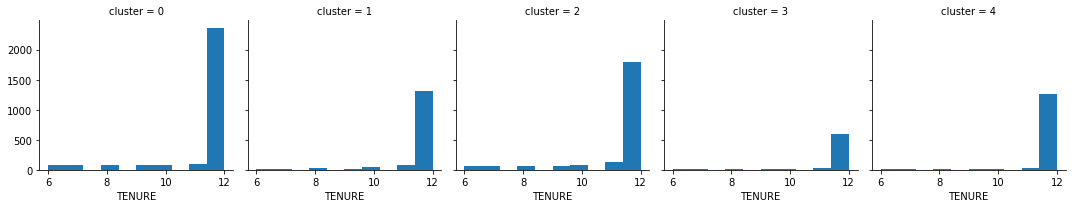

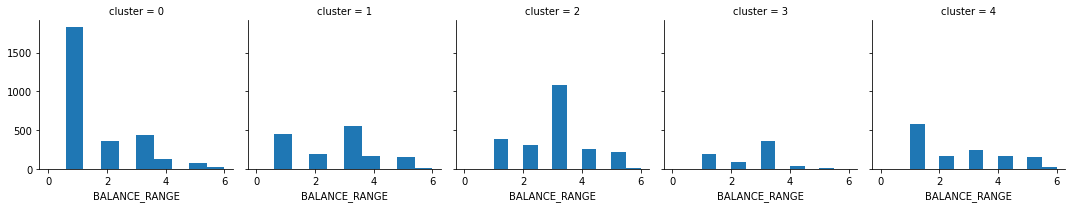

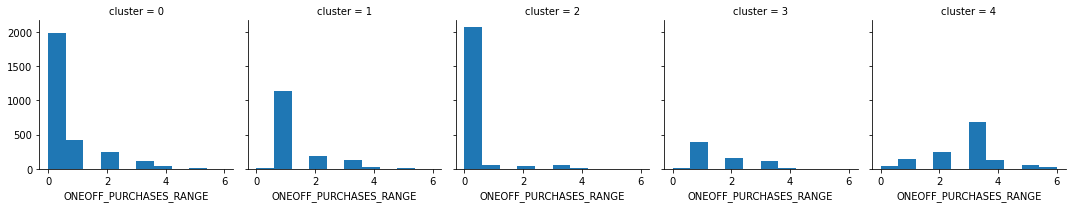

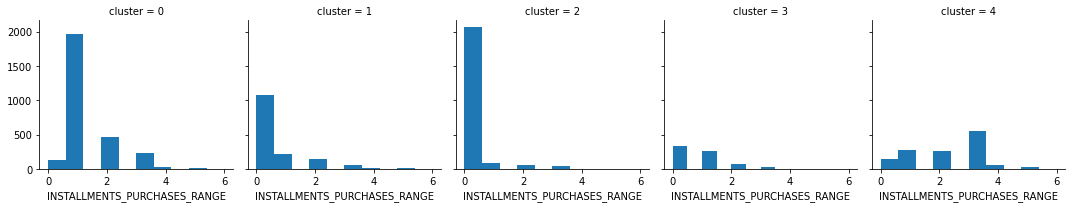

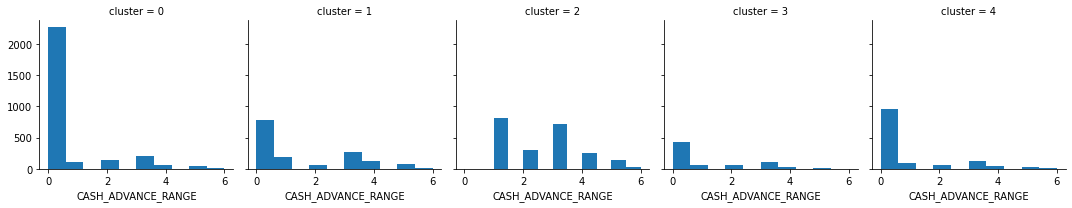

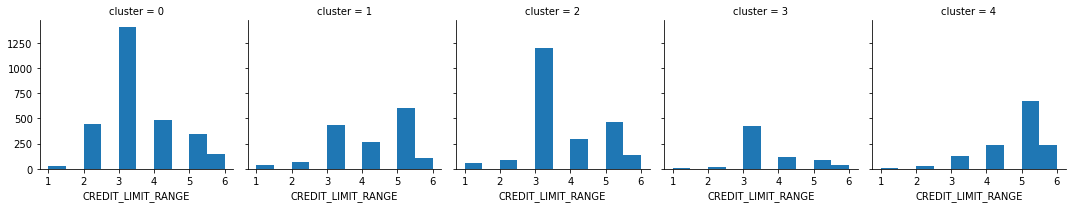

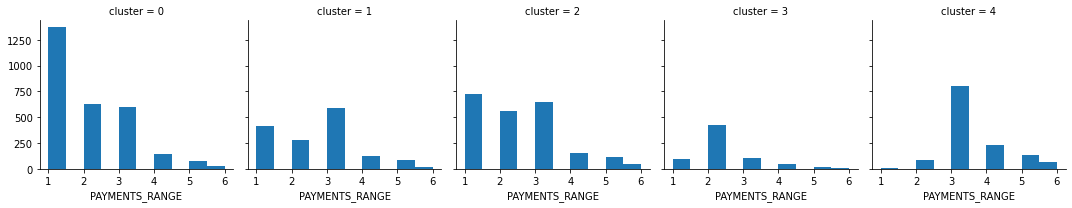

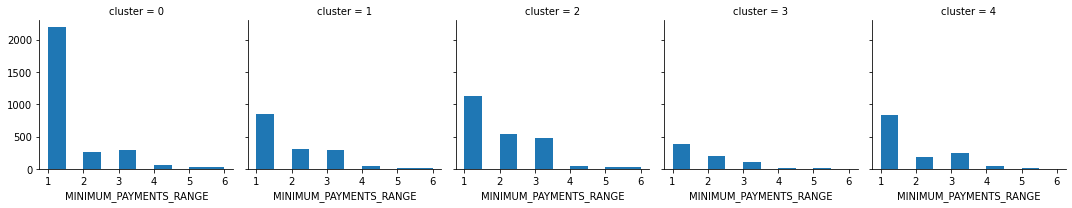

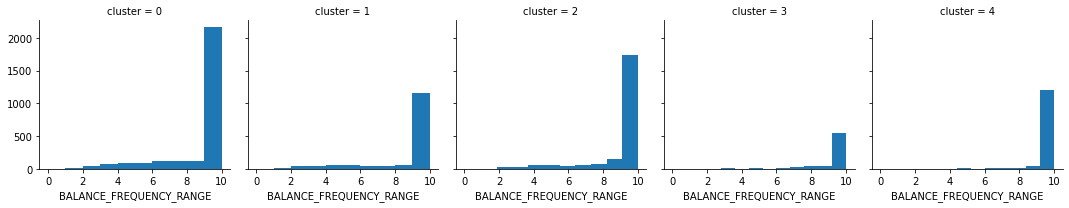

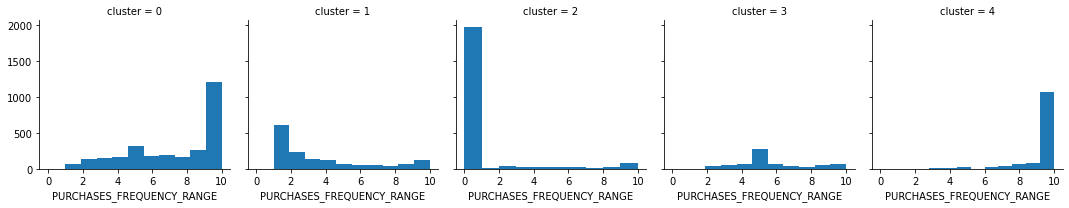

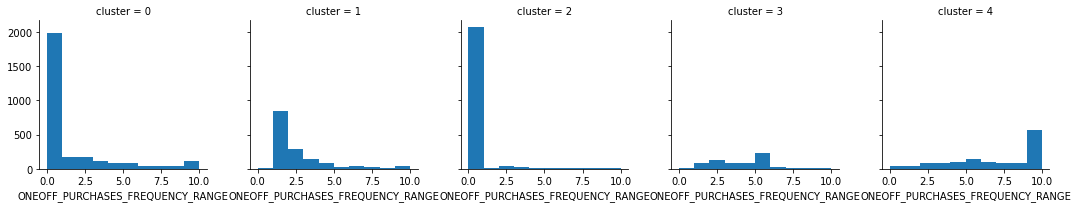

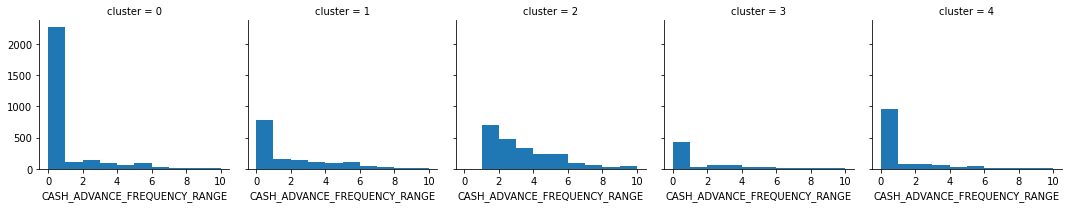

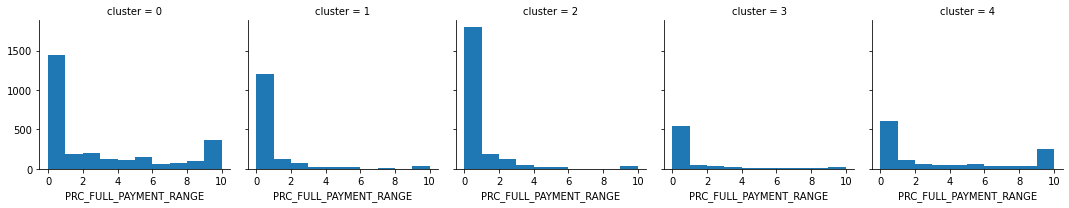

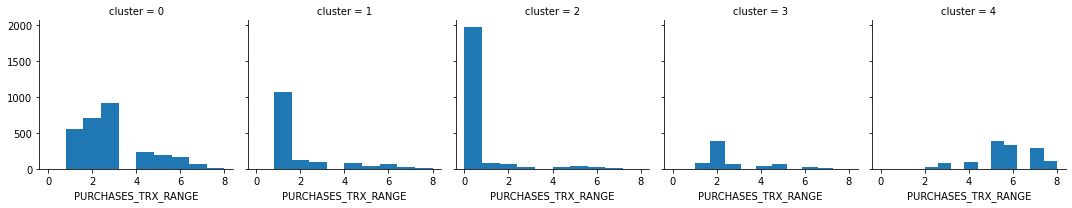

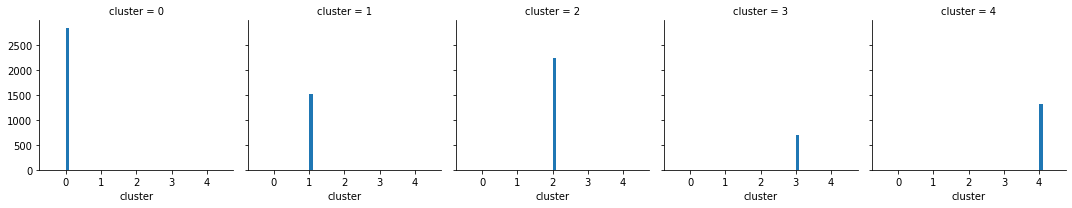

In [37]:
for c in clusters_H:
    grid= sns.FacetGrid(clusters_Kmode, col='cluster')
    grid.map(plt.hist, c)

# K-Modes/Hierarchical

In [63]:
X= np.asarray(cci_data)
kmodes= KModes(n_clusters=300, init = "Cao", n_init = 1, verbose=1)
kmodes.fit(X)
labels=kmodes.labels_
clusters_Kmode=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmode.dropna(inplace = True)

In [52]:
C = clusters_Kmode.groupby('cluster').mean()

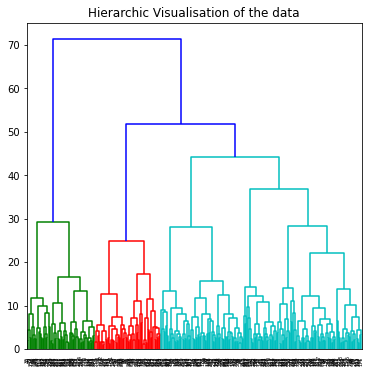

In [54]:
X= np.asarray(C)
plt.figure(figsize =(6, 6))
plt.title('Hierarchic Visualisation of the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward', metric= 'euclidean')))

In [55]:
sil = []
for n_cluster in range(2, 8):
    sil.append(silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)))

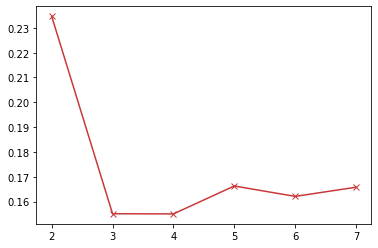

In [56]:
plt.plot(np.arange(2,8), sil, 'bx-', color = '#C93838')

In [59]:
agg = AgglomerativeClustering(n_clusters = 3).fit_predict(X)
clusters_H=pd.concat([cci_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters_H.dropna(inplace = True)
clusters_H.head()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,cluster
0,12,1,0,1,0,2,1,1,9,2,0,0,0,1,0.0
1,12,4,0,0,5,5,4,3,10,0,0,3,3,0,2.0
2,12,3,2,0,0,5,2,2,10,10,10,0,0,3,2.0
3,12,2,1,0,0,3,2,1,10,1,1,0,0,1,0.0
4,12,3,0,3,0,3,3,3,10,7,0,0,0,2,1.0


In [60]:
clusters_H.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE
cluster,,,,,,,,,,,,,,
0.0,11.733333,3.005556,1.427778,1.277778,1.350000,4.366667,2.933333,2.138889,9.466667,5.716667,2.877778,1.655556,1.344444,2.983333
1.0,11.852459,2.819672,1.278689,1.032787,1.278689,4.393443,2.803279,2.016393,9.049180,5.360656,2.655738,1.442623,1.377049,2.459016
2.0,11.694915,2.457627,1.389831,1.050847,1.101695,4.220339,2.576271,1.728814,9.288136,5.661017,3.067797,1.203390,1.101695,2.779661


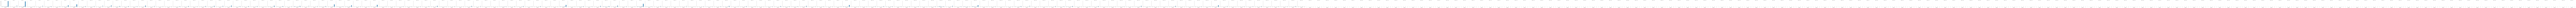

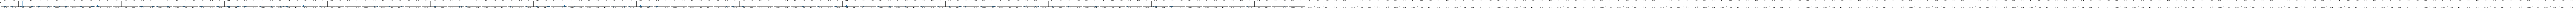

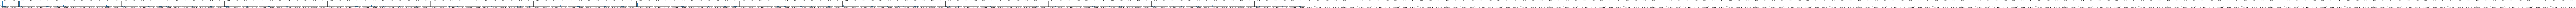

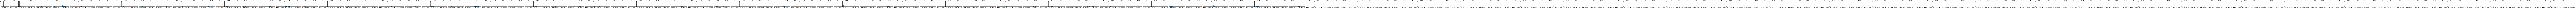

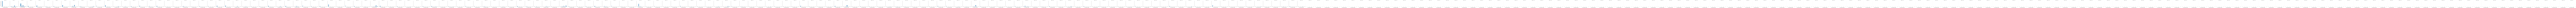

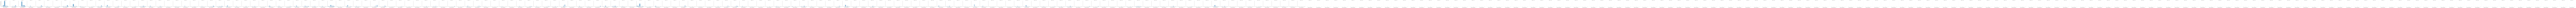

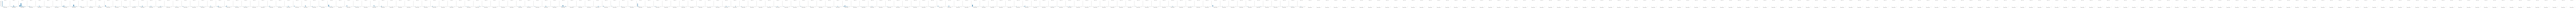

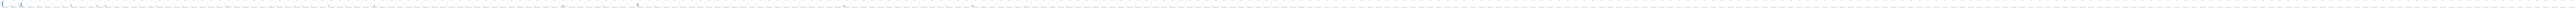

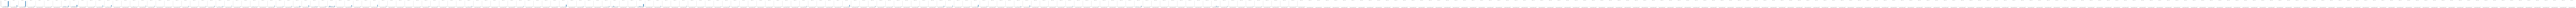

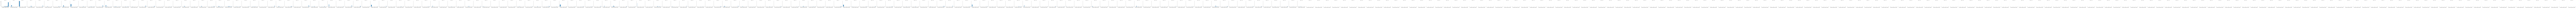

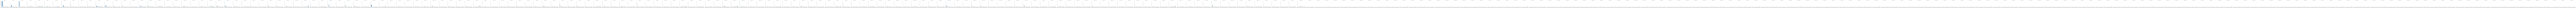

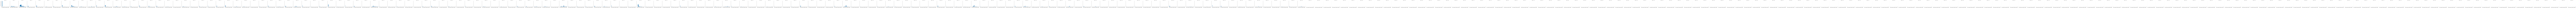

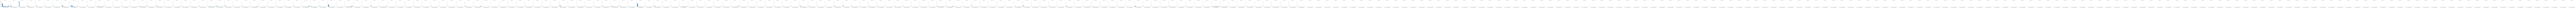

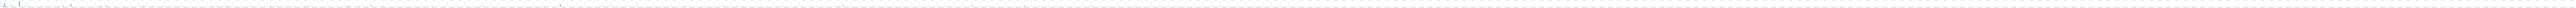

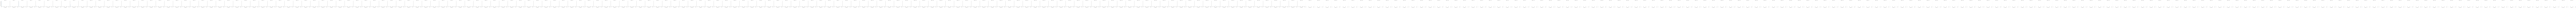

In [61]:
for c in clusters_H:
    grid= sns.FacetGrid(clusters_Kmode, col='cluster')
    grid.map(plt.hist, c)

In [64]:
X= np.asarray(cci_data)
kmodes= KModes(n_clusters=1000, init = "Cao", n_init = 1, verbose=1)
kmodes.fit(X)
labels=kmodes.labels_
clusters_Kmode=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmode.dropna(inplace = True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2240, cost: 18324.0
Run 1, iteration: 2/100, moves: 499, cost: 18243.0
Run 1, iteration: 3/100, moves: 45, cost: 18234.0
Run 1, iteration: 4/100, moves: 12, cost: 18229.0
Run 1, iteration: 5/100, moves: 2, cost: 18228.0
Run 1, iteration: 6/100, moves: 0, cost: 18228.0


In [65]:
C = clusters_Kmode.groupby('cluster').mean()

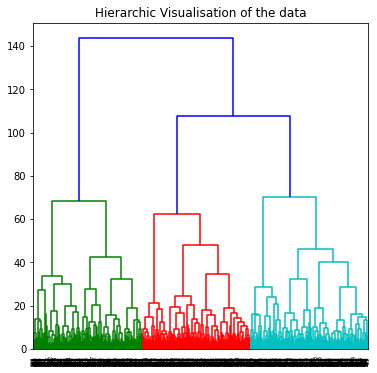

In [66]:
X= np.asarray(C)
plt.figure(figsize =(6, 6))
plt.title('Hierarchic Visualisation of the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward', metric= 'euclidean')))

In [67]:
sil = []
for n_cluster in range(2, 8):
    sil.append(silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)))

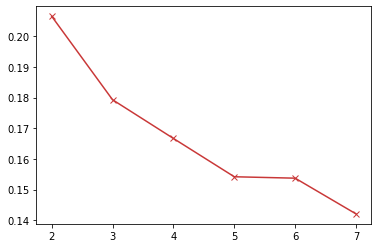

In [68]:
plt.plot(np.arange(2,8), sil, 'bx-', color = '#C93838')